In [201]:
import pandas as pd
import numpy as np
import scipy.stats as st     
import matplotlib.pyplot as plt
from numpy import *

In [243]:
data = pd.read_csv('data.csv', index_col=0)
#data


In [170]:
data0=np.asarray(data.iloc[:,0])
data1=np.asarray(data.iloc[:,1])
data2=np.asarray(data.iloc[:,2])
data3=np.asarray(data.iloc[:,3])


In [4]:
import pandas as pd
import numpy as np
import scipy.stats as st     # Librería estadística
import matplotlib.pyplot as plt

In [367]:
## ESTE CODIGO --> PRUEBAS DE HIPÓTESIS CON DIFERENTES DISTRIBUCIONES, CON SAMPLES.

import scipy.stats as st
def get_best_distribution(data):
    dist_names = ['beta', 'norm', 'lognorm', 'erlang', 'uniform', 'cauchy', 'expon' , 'gamma', 
                  'laplace', 'triang', 'logistic', 'rayleigh', 'rice', 'loglaplace', 'halfcauchy', 
                  'exponnorm', 'alpha', 'uniform', 'loggamma', 'rdist']
    dist_results = []
    params = {}
    for dist_name in dist_names:
        dist = getattr(st, dist_name)
        param = dist.fit(data)

        params[dist_name] = param
        # Applying the Kolmogorov-Smirnov test
        D, p = st.kstest(data, dist_name, args=param)
        print("p value for "+dist_name+" = "+str(p))
        dist_results.append((dist_name, p))

    # select the best fitted distribution
    best_dist, best_p = (max(dist_results, key=lambda item: item[1]))
    # store the name of the best fit and its p value

    print("Best fitting distribution: "+str(best_dist))
    print("Best p value: "+ str(best_p))
    print("Parameters for the best fit: "+ str(params[best_dist]))

    return best_dist, best_p, params[best_dist]

#get_best_distribution(data0) ## LLAMAR FUNCIÓN CON DATOS DE COLUMNA SELECTA.

## ÍNDICE DE MORTALIDAD A 1 AÑO

Valor de chi cuadrado librería =  Power_divergenceResult(statistic=90.90614867881027, pvalue=0.7067593310331185)
Estadístico de chi_cuadrado =  120.98964369660958
Param s =  0.6151154975172486
Param 1 =  6.544393631974837
Param 2 =  3.4951724002335367


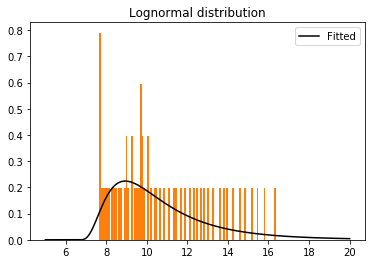

In [352]:
####################################################################

samp = data0
param = st.lognorm.fit(samp) # distribution fitting

# now, param[0] and param[1] are the mean and 
# the standard deviation of the fitted distribution
x = np.linspace(5,20,10000)
# fitted distribution
pdf_fitted = st.lognorm.pdf(x, param[0], loc=param[1],scale=param[2])

J=100
plt.title('Lognormal distribution')
plt.plot(x,pdf_fitted,'k-',label='Fitted')
plt.legend()
plt.hist(samp,J,density=1,alpha=.8,)
#plt.show()



[freq,x,p]=plt.hist(data0,J,density=True)
x = x[:-1] 
pi = st.lognorm.pdf(x, param[0], loc=param[1],scale=param[2])

# Cálculo de la esperanza usando la expresión teórica
Ei = x*pi

# Cálculo usando la librería estadística de la chi cuadrada
X2 = st.chisquare(freq,Ei)
print('Valor de chi cuadrado librería = ',X2)

# Cálculo de Grados de libertad del estadístico
p = 2 # Parámetros estimados con los datos
m = J-p-1 # grados de libertad

Chi_est = st.chi2.ppf(q = 0.95,df=m)
print('Estadístico de chi_cuadrado = ',Chi_est)
print('Param s = ',param[0])
print('Param 1 = ',param[1])
print('Param 2 = ',param[2])


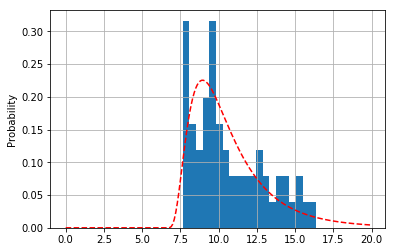

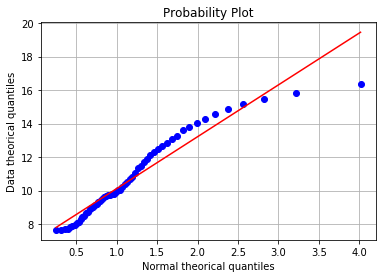

In [59]:
## COLUMNA 1
measurements = data0
# Histograma de las variables creadas
divisiones = 20 # Cantidad de barras en el histograma
plt.hist(measurements,divisiones,density=True)
x = np.arange(0,20,.1)
y = st.lognorm.pdf(x, s= 0.61, loc=6.54,scale=3.495)
plt.plot(x,y,'r--')
plt.ylabel('Probability')
plt.grid()
plt.show()

# gráfica de Q-Q entre las muestras creadas y una curva normal
grap1 = st.probplot(measurements, dist='lognorm', plot=plt, sparams=(param[0]))
plt.grid()
plt.xlabel('Normal theorical quantiles')
plt.ylabel('Data theorical quantiles')
plt.show()


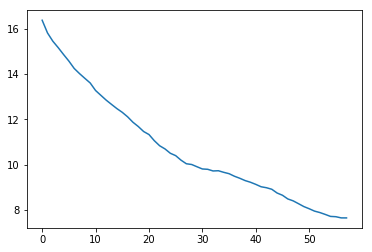

In [199]:
plt.plot(data0)


> $H_0$: la distribución es `Lognorm` con Param S = 0.615, y Param 1 = 6.54 y Param 2 = 3.49

> $H_a$: los datos no se distribuyen como `Lognorm`

- **Distribuida como Lognormal dada la prueba chi-square. No se rechaza la $H_o$**

## ÍNDICE DE MORTALIDAD A 5 AÑO

Valor de chi cuadrado librería =  Power_divergenceResult(statistic=3183.9364259752374, pvalue=0.0)
Estadístico de chi_cuadrado =  120.98964369660958
Param 1 =  0.7447518884100817
Param 2 =  1.0505950417385368
Param 3 =  30.322423639999997
Param 4 =  126.37889660022543


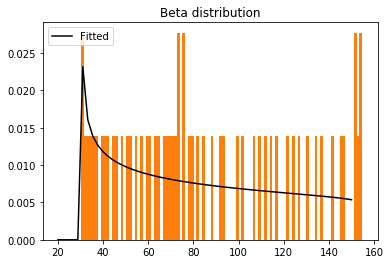

In [365]:
####################################################################

samp = data1
param = st.beta.fit(samp) # distribution fitting

# now, param[0] and param[1] are the mean and 
# the standard deviation of the fitted distribution
x = np.linspace(20,150,60)
# fitted distribution
pdf_fitted = st.beta.pdf(x, param[0], param[1], loc=param[2],scale=param[3])

plt.title('Beta distribution')
plt.plot(x,pdf_fitted,'k-',label='Fitted')
plt.legend()
plt.hist(samp,100,density=1,alpha=.8,)
#plt.show()


J=100
[freq,x,p]=plt.hist(data1,J,density=True)
x = x[:-1] 
pi = st.beta.pdf(x, param[0], param[1], loc=param[2],scale=param[3])

# Cálculo de la esperanza usando la expresión teórica
Ei = x*pi

# Cálculo usando la librería estadística de la chi cuadrada
X2 = st.chisquare(freq,Ei)
print('Valor de chi cuadrado librería = ',X2)

# Cálculo de Grados de libertad del estadístico
p = 2 # Parámetros estimados con los datos
m = J-p-1 # grados de libertad

Chi_est = st.chi2.ppf(q = 0.95,df=m)
print('Estadístico de chi_cuadrado = ',Chi_est)
print('Param 1 = ',param[0])
print('Param 2 = ',param[1])
print('Param 3 = ',param[2])
print('Param 4 = ',param[3])


> $H_0$: la distribución es `Beta` con a = .744 y b = 1.05, y Param 3 = 30.32 y Param 4 = 126.37

> $H_a$: los datos no se distribuyen como `Beta`

- **No distribuida como Beta dada la prueba chi-square. Se rechaza la $H_o$**

- **Aunque parece ser que se ajusta a Beta, no pasa la prueba chi-square.**

Valor de chi cuadrado librería =  Power_divergenceResult(statistic=55.82236166329669, pvalue=0.9998587275652463)
Estadístico de chi_cuadrado =  120.98964369660958
Param 1 =  0.4423966767384555
Param 2 =  -6.702441949732508
Param 3 =  83.6423355425093


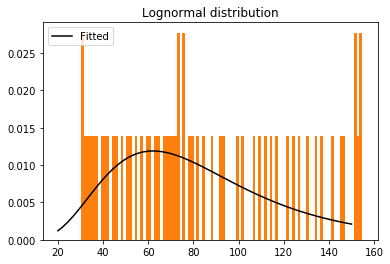

In [356]:
####################################################################

samp = data1
param = st.lognorm.fit(samp) # distribution fitting

# now, param[0] and param[1] are the mean and 
# the standard deviation of the fitted distribution
x = np.linspace(20,150,60)
# fitted distribution
pdf_fitted = st.lognorm.pdf(x, param[0], loc=param[1],scale=param[2])

plt.title('Lognormal distribution')
plt.plot(x,pdf_fitted,'k-',label='Fitted')
plt.legend()
plt.hist(samp,100,density=1,alpha=.8,)
#plt.show()


J=100
[freq,x,p]=plt.hist(data1,J,density=True)
x = x[:-1] 
pi = st.lognorm.pdf(x, param[0], loc=param[1],scale=param[2])

# Cálculo de la esperanza usando la expresión teórica
Ei = x*pi

# Cálculo usando la librería estadística de la chi cuadrada
X2 = st.chisquare(freq,Ei)
print('Valor de chi cuadrado librería = ',X2)

# Cálculo de Grados de libertad del estadístico
p = 2 # Parámetros estimados con los datos
m = J-p-1 # grados de libertad

Chi_est = st.chi2.ppf(q = 0.95,df=m)
print('Estadístico de chi_cuadrado = ',Chi_est)
print('Param 1 = ',param[0])
print('Param 2 = ',param[1])
print('Param 3 = ',param[2])
#print('Param 4 = ',param[3])

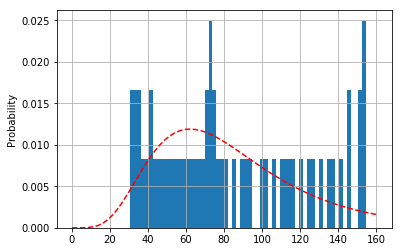

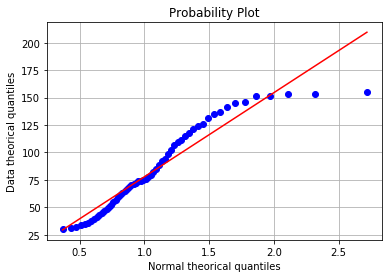

In [308]:
measurements = data1
# Histograma de las variables creadas
divisiones = 60 # Cantidad de barras en el histograma
plt.hist(measurements,divisiones,density=True)
x = np.linspace(0,160,60)
y = st.lognorm.pdf(x, param[0], loc=param[1],scale=param[2])
plt.plot(x,y,'r--')
plt.ylabel('Probability')
plt.grid()
plt.show()

# gráfica de Q-Q entre las muestras creadas y una curva normal
grap1 = st.probplot(measurements, dist='lognorm', plot=plt, sparams=param[0])
plt.grid()
plt.xlabel('Normal theorical quantiles')
plt.ylabel('Data theorical quantiles')
plt.show()

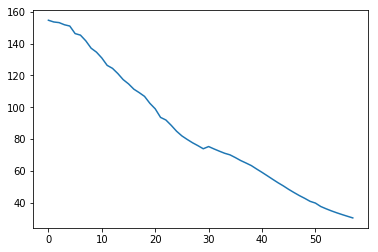

In [198]:
plt.plot(data1)


> $H_0$: la distribución es `Lognormal` con S = 0.44, y Param 1 = -6.70 y Param 2 = 83.64

> $H_a$: los datos no se distribuyen como `Lognormal`

- **Distribuida como Lognormal dada la prueba chi-square. No se rechaza la $H_o$**

## EXPECTATIVA DE VIDA

Valor de chi cuadrado librería =  Power_divergenceResult(statistic=192.52716838801356, pvalue=4.553439801372563e-16)
Estadístico de chi_cuadrado =  75.62374846937608
Param 1 =  1.0185727259886623
Param 2 =  0.8873683876489982
Param 3 =  53.36865384086978
Param 4 =  18.952549009130227


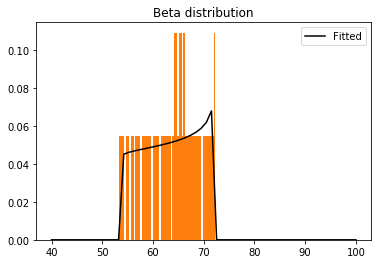

In [363]:
####################################################################

samp = data2
param = st.beta.fit(samp) # distribution fitting

# now, param[0] and param[1] are the mean and 
# the standard deviation of the fitted distribution
x = np.linspace(40,100,60)
# fitted distribution
pdf_fitted = st.beta.pdf(x, param[0], param[1], loc=param[2],scale=param[3])

plt.title('Beta distribution')
plt.plot(x,pdf_fitted,'k-',label='Fitted')
plt.legend()
plt.hist(samp,60,density=1,alpha=.8,)
#plt.show()


J=60
[freq,x,p]=plt.hist(data2,J,density=True)
x = x[:-1] 
pi = st.beta.pdf(x,param[0], param[1], loc=param[2],scale=param[3])

# Cálculo de la esperanza usando la expresión teórica
Ei = x*pi

# Cálculo usando la librería estadística de la chi cuadrada
X2 = st.chisquare(freq,Ei)
print('Valor de chi cuadrado librería = ',X2)

# Cálculo de Grados de libertad del estadístico
p = 2 # Parámetros estimados con los datos
m = J-p-1 # grados de libertad

Chi_est = st.chi2.ppf(q = 0.95,df=m)
print('Estadístico de chi_cuadrado = ',Chi_est)
print('Param 1 = ',param[0])
print('Param 2 = ',param[1])
print('Param 3 = ',param[2])
print('Param 4 = ',param[3])

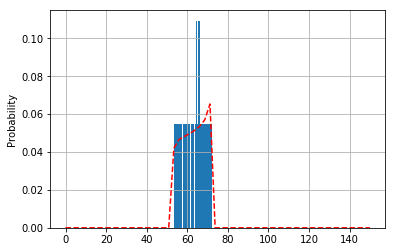

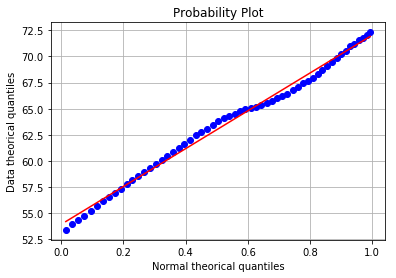

In [218]:
measurements = data2
# Histograma de las variables creadas
divisiones = 60 # Cantidad de barras en el histograma
plt.hist(measurements,divisiones,density=True)
x = np.linspace(0,150,60)
y = st.beta.pdf(x,param[0], param[1], loc=param[2],scale=param[3])
plt.plot(x,y,'r--')
plt.ylabel('Probability')
plt.grid()
plt.show()

# gráfica de Q-Q entre las muestras creadas y una curva normal
grap1 = st.probplot(measurements, dist='beta', plot=plt, sparams=(param[0], param[1]))
plt.grid()
plt.xlabel('Normal theorical quantiles')
plt.ylabel('Data theorical quantiles')
plt.show()

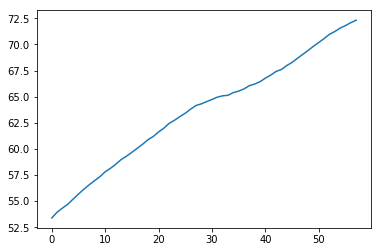

In [197]:
plt.plot(data2)


> $H_0$: la distribución es `Beta` con a = 1.01 y b = .88, y Param 3 = 53.36 y Param 4 = 18.95

> $H_a$: los datos no se distribuyen como `Beta`

- **No distribuida como Beta dada la prueba chi-square. Se rechaza la $H_o$**
- **Probándose con otras es la que más se ajusta a probplot. Pero no paza la prueba chi-square.**

## INPB

Valor de chi cuadrado librería =  Power_divergenceResult(statistic=6.245592446946157, pvalue=1.0)
Estadístico de chi_cuadrado =  75.62374846937608
Param 1 =  2.189912660087926
Param 2 =  7840.505906760038


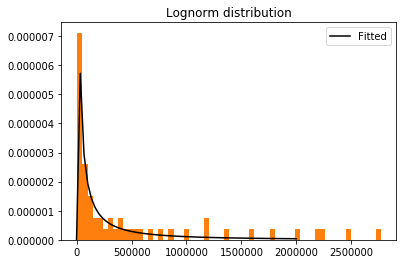

In [366]:
####################################################################

samp = data3
param = st.lognorm.fit(samp) # distribution fitting

# now, param[0] and param[1] are the mean and 
# the standard deviation of the fitted distribution
x = np.linspace(0,2000000,60)
# fitted distribution
pdf_fitted = st.lognorm.pdf(x, param[0], loc=param[1],scale=param[2])

plt.title('Lognorm distribution')
plt.plot(x,pdf_fitted,'k-',label='Fitted')
plt.legend()
plt.hist(samp,60,density=1,alpha=.8,)
#plt.show()


J=60
[freq,x,p]=plt.hist(data3,J,density=True)
x = x[:-1] 
pi = st.lognorm.pdf(x, param[0], loc=param[1],scale=param[2])

# Cálculo de la esperanza usando la expresión teórica
Ei = x*pi

# Cálculo usando la librería estadística de la chi cuadrada
X2 = st.chisquare(freq,Ei)
print('Valor de chi cuadrado librería = ',X2)

# Cálculo de Grados de libertad del estadístico
p = 2 # Parámetros estimados con los datos
m = J-p-1 # grados de libertad

Chi_est = st.chi2.ppf(q = 0.95,df=m)
print('Estadístico de chi_cuadrado = ',Chi_est)
print('Param 1 = ',param[0])
print('Param 2 = ',param[1])
#print('Param 3 = ',param[2])

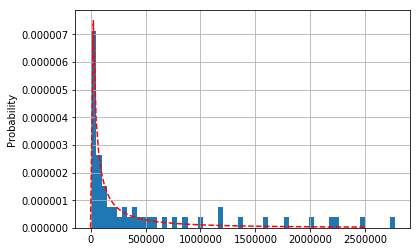

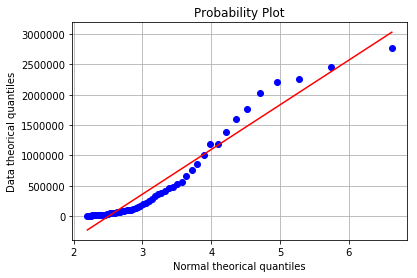

In [281]:
measurements = data3
# Histograma de las variables creadas
divisiones = 60 # Cantidad de barras en el histograma
plt.hist(measurements,divisiones,density=True)
x = np.linspace(0,2500000,100)
y = st.lognorm.pdf(x, param[0], loc=param[1],scale=param[2])
plt.plot(x,y,'r--')
plt.ylabel('Probability')
plt.grid()
plt.show()

# gráfica de Q-Q entre las muestras creadas y una curva normal
grap1 = st.probplot(measurements, dist='expon', plot=plt, sparams=param[0])
plt.grid()
plt.xlabel('Normal theorical quantiles')
plt.ylabel('Data theorical quantiles')
plt.show()

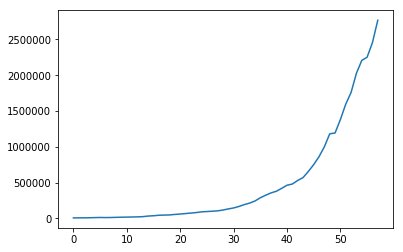

In [234]:
plt.plot(data3)


> $H_0$: la distribución es `Lognorm` con S = 2.18, y Param 2 = 7840.50 y Param 3 = 104133.00

> $H_a$: los datos no se distribuyen como `Lognorm`

- **Distribuida como Lognorm dada la prueba chi-square. No se rechaza la $H_o$**

## CORRELACIONES

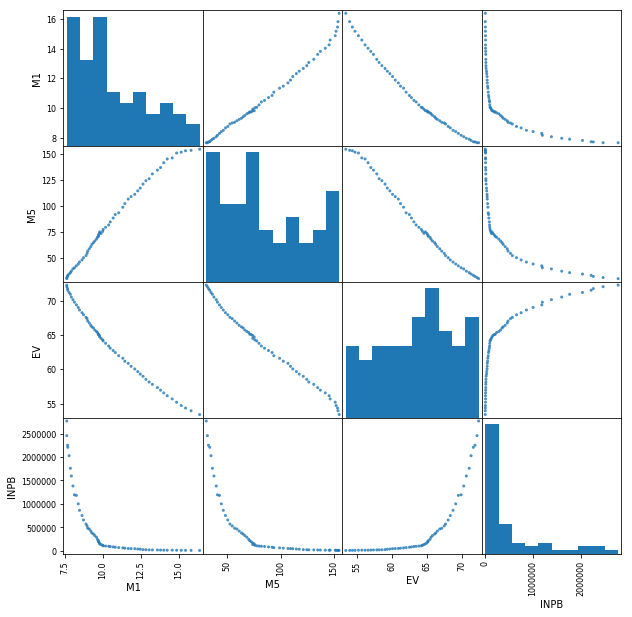

In [381]:
import pandas.plotting as cor
cor.scatter_matrix(data, #diagonal='kde',#
                   alpha=0.8, figsize=(10,10));

In [378]:
data.corr()

,M1,M5,EV,INPB
M1,1.000000,0.992128,-0.987486,-0.688883
M5,0.992128,1.000000,-0.995761,-0.736185
EV,-0.987486,-0.995761,1.000000,0.786745
INPB,-0.688883,-0.736185,0.786745,1.000000
